# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [6]:
#Download the data zip file and extract the data file from it.
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
!unzip individual+household+electric+power+consumption.zip

--2025-01-20 14:26:35--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘individual+household+electric+power+consumption.zip.2’

individual+househol     [    <=>             ]  19.68M  27.1MB/s    in 0.7s    

2025-01-20 14:26:36 (27.1 MB/s) - ‘individual+household+electric+power+consumption.zip.2’ saved [20640916]

Archive:  individual+household+electric+power+consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: household_power_consumption.txt  


In [7]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

<ipython-input-7-3fba114b5bcf>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [8]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [10]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [11]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [12]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = '%d/%m/%Y %H:%M:%S')

In [13]:
#convert all data columns to numeric types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors = 'coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors = 'coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors = 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors = 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors = 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors = 'coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors = 'coerce')





Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [14]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [15]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [47]:
df.Date[0]

datetime.date(2006, 12, 16)

In [48]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [49]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

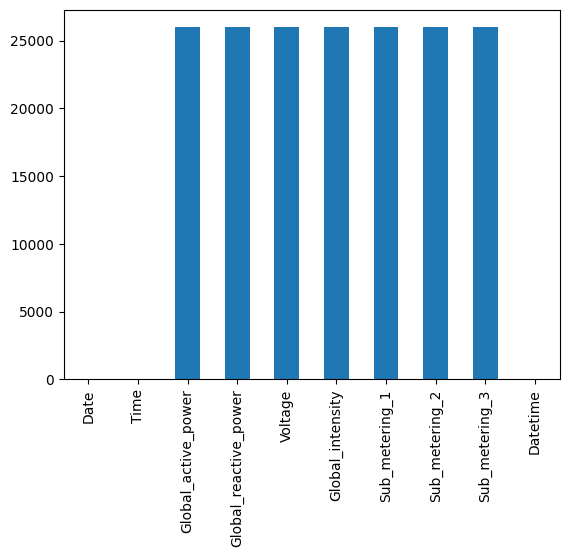

In [50]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

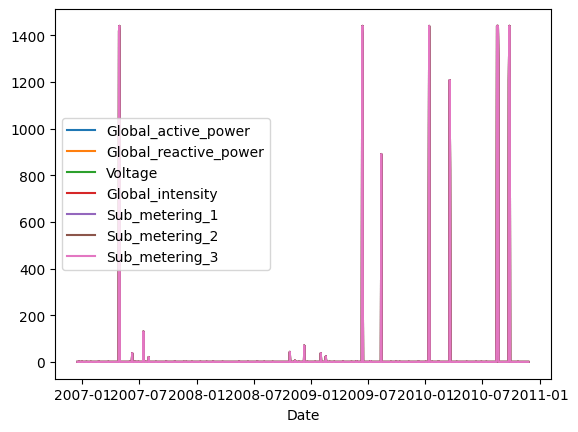

In [51]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

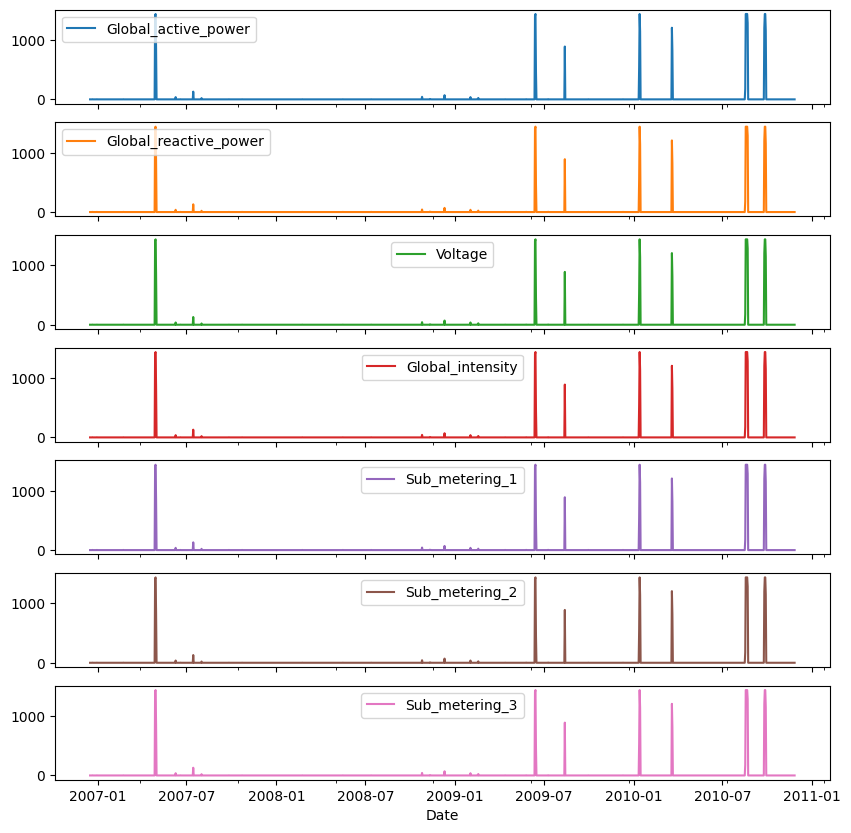

In [54]:
df_na.plot(x='Date', y=df_na.columns[2:-1], subplots=True, figsize=(10,10))

**Q: What do you notice about the pattern of missing data?**

A: The dataset contains around 25K records of missing values out of total records 2049280 present in the dataset.

It looks like that data is missing during specific month in an year such between 2007-04 and 2007 05, 2009-07 and 2009-09, 2010-01 and 2010-03 etc.

During this time, data for all attributes are missing. It might be a problem due to network connectivity issue.



**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: There are various methodology we can use to address the missing values in a dataset as mentioned below.

1. Remove records containing missing value: in case, the dataset has a very missing observations, it is recommended to simply drop these records. Dropping a few records from a dataset does not necessary alter the pattern captured in the dataset.

2. Imputation: Replace the missing value using mean/max/min etc or  
2.a. Fill forward: fill last known value to all the missing data
2.b. Fill Backward: Fill the next known value to the missing data
2.c. Identify a series of value between last known and next value and fill the missing attribute value accordingly
2.d. Use machine learning algo to identify appropriate data to fill missing values.


**TODO:Use your preferred method to remove or impute a value for the missing data**

In [16]:
#clean up missing data here
df = df.ffill()


In [56]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0862,0.1233,240.8416,4.6042,1.1110,1.2880,6.4166,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,239.0000,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.5980,0.1000,241.0200,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5240,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0532,0.1125,3.2356,4.4268,6.1159,5.7869,8.4195,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:  I have selected following variables for visualisation.
 a. 'Global_active_power' ,
 b. 'Sub_metering_1',
 c. 'Sub_metering_2',
 d. 'Sub_metering_3'

I want to see the impact of power consumption based on various appliances used depending on the time of the year and it is captured by difference metering.  e.g. heating appliances will be used more in winter as captured using sub_metering3.

Reading of sub_meterming_1 provide an insight whether a family cooks dinner at home or order outside food by looking at the usage of electricity for kitchen appliances

Similary reading from sub_metering_2 provides insight based on various utility e.g. laundry machine, refrigerator and light. Its usage will vary depending on the time of the day as well as week e.g. laundry might once a week and consumption of power due to light will be more at night.




array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

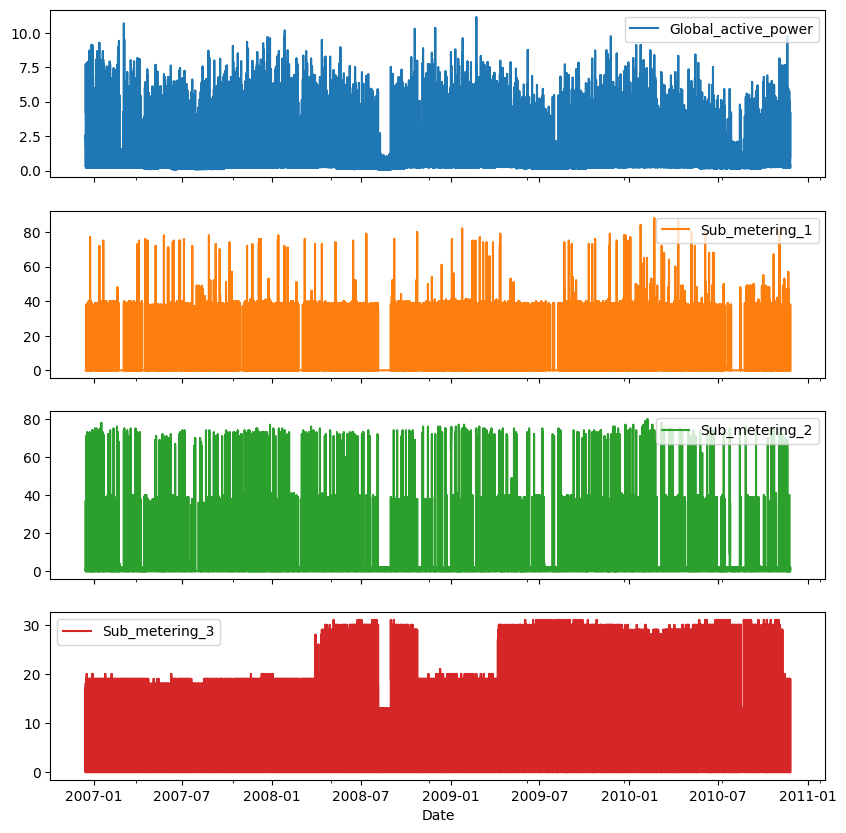

In [17]:
#build your line chart here
selected_cols = ['Global_active_power' ,'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df.plot(x='Date', y=selected_cols, subplots=True, figsize=(10,10))

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:
1. It captures the impacts of three measurements from the sub-meterings to global active power consumption at a very high level. Wherever there is a drop of measurement in all three meters, the actual power consumption was also low (during 2008-07).

2. Since there are too many observations with varying values during the periods, it is very difficult to get the exact trend.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [26]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df['Month'] = df['Datetime'].dt.to_period("M")
df_monthly = df.copy()
grouped_cols = ['Global_active_power' ,'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Month']
monthly_avg  = df_monthly[grouped_cols].groupby(pd.Grouper(key='Month')).mean()

df_monthly['Global_active_power_monthly_agg'] = monthly_avg['Global_active_power']
df_monthly['Sub_metering_1_monthly_agg'] = monthly_avg['Sub_metering_1']
df_monthly['Sub_metering_2_monthly_agg'] = monthly_avg['Sub_metering_2']
df_monthly['Sub_metering_3_monthly_agg'] = monthly_avg['Sub_metering_3']
monthly_avg= monthly_avg.reset_index()






In [27]:
#temp. will be deleted.
monthly_avg.head()

,Month,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12,1.901537,1.251864,2.216312,7.409847
1,2007-01,1.546085,1.264180,1.775851,7.383759
2,2007-02,1.401165,1.180159,1.602282,6.704067
3,2007-03,1.318606,1.361313,2.346819,6.504503
4,2007-04,0.856787,0.974028,0.889282,4.386644


array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
       <Axes: xlabel='Month'>, <Axes: xlabel='Month'>], dtype=object)

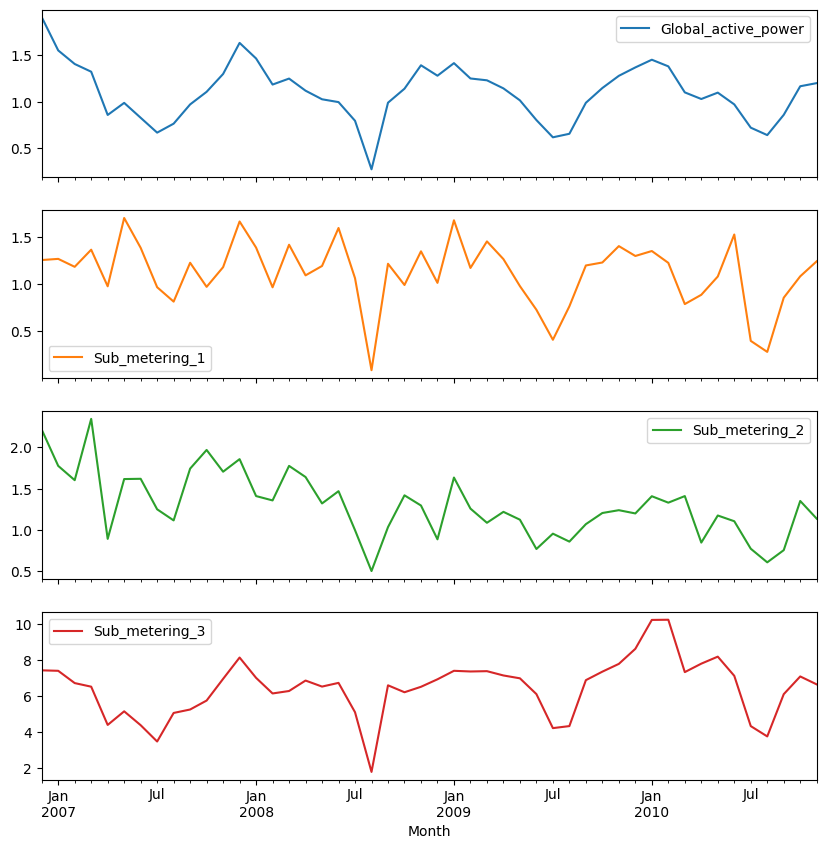

In [28]:
#build your linechart here
agg_cols = ['Global_active_power' ,'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
monthly_avg.plot.line(x='Month', y=agg_cols, subplots=True, figsize=(10,10))


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A:  
1. The range of variation of the reading of sub_metering_1 and sub_metering_2 are less compared to sub_metering_3 readings. Impact of the sub_metering_3 is more on global_active_power measurement.

2. It looks like that other overall consumption is lowest in every July month as pointed out in all three meter readings along with global_active_power measurement.

3. In Jan month, there is a high demand of power (sub_metering_3) due to cold, hence the global_active_power value is also at higher level.




**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [44]:
#compute your moving average here
grouped_cols1 = ['Global_active_power' ,'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Date']
monthly_avg_rolling  = df[grouped_cols1].groupby(pd.Grouper(key='Date')).rolling(30).mean()
monthly_avg_rolling = monthly_avg_rolling.reset_index()


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

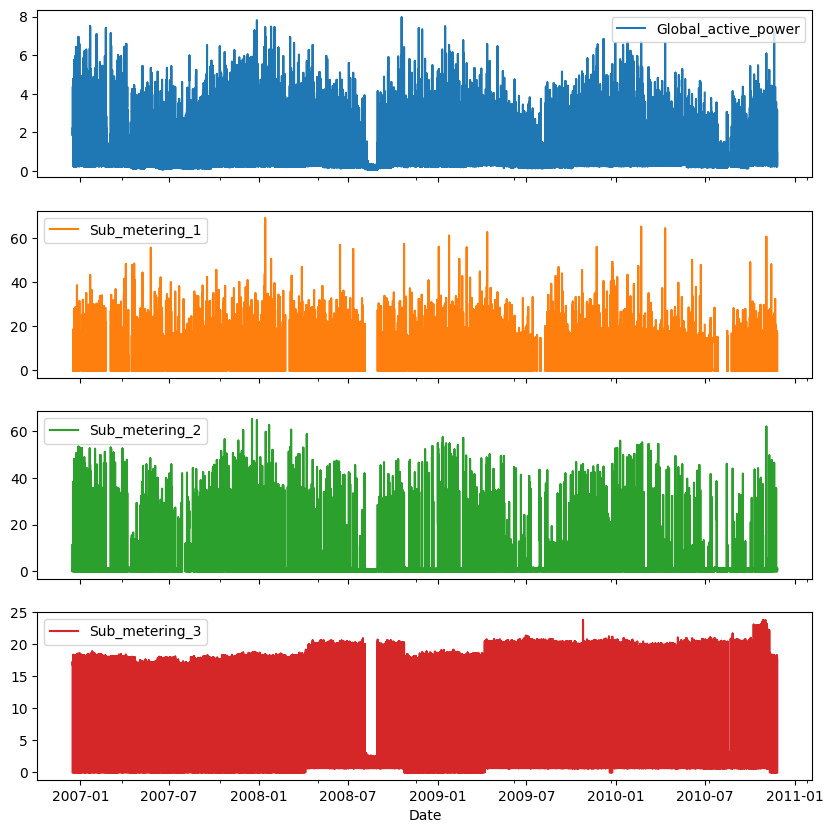

In [45]:
#build your line chart on the moving average here
monthly_avg_rolling.plot.line(x='Date', y=agg_cols, subplots=True, figsize=(10,10))


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The monthly average and 30 day moving average graph shows the similar pattern. 30 day moving average actually even out the certain peak in a specific month.

B. Both months shows lowest consumption in July and highest in Jan timeframe.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

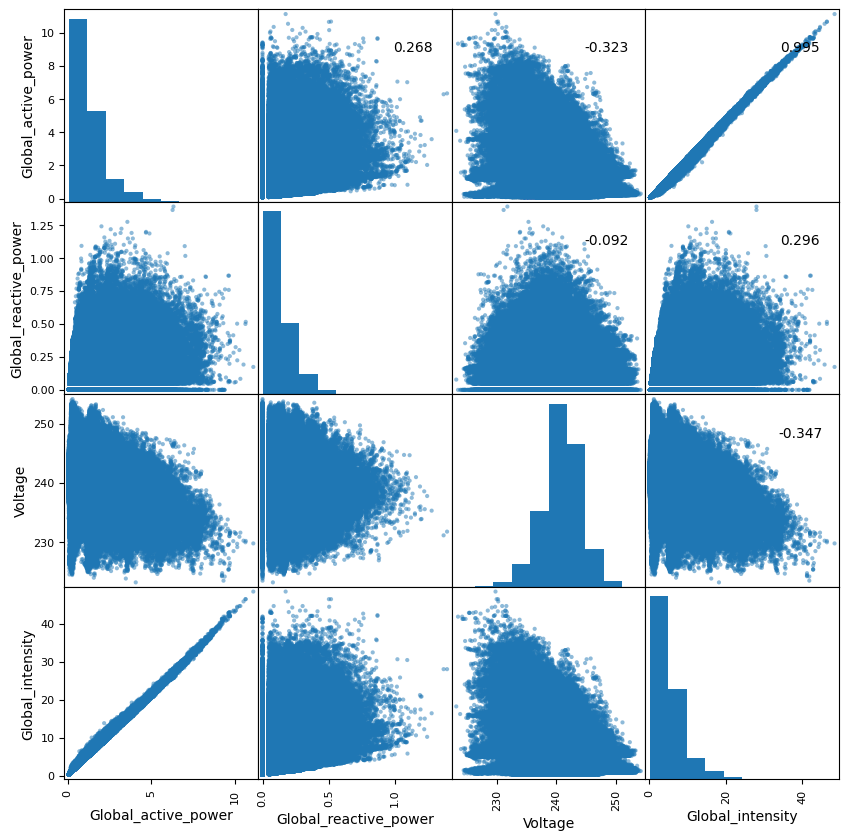

In [48]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:
1. There is a strong positive corelations between global_active_power and global_intensity.

2. Global_active_power and global_reactive_power is not corelated since the value is closer to zero.

3. The correlations between following attributes are weak means not related.
 a.  global_active_power and global_reactive_power,
 b.  global_active_power and voltage,
 c. global_reactive_power and voltage,
 d. global_intesity and voltage is weak.

